  # Implementing  and Pruning FP-growth in Python

### Imports

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules

corpus_list is a nested list of  preprocessed and vectorized user reviews. In other words, it  the list of transactions that is going to be used in FP-growth

In [5]:
%store -r corpus_list

In [6]:
corpus_list[0]

['constantly',
 'offline',
 'multiple',
 'device',
 'sign',
 'sign',
 'tell',
 'echo',
 'line',
 'device',
 'connect',
 'work',
 'correctly',
 'reset',
 'echo',
 'multiple',
 'time',
 'create',
 'account',
 'reinstall',
 'multiple',
 'device',
 'result',
 'account',
 'constantly',
 'line',
 'numerous',
 'email',
 'desk',
 'reply',
 'account',
 'server',
 'issue',
 'amazon',
 'honest',
 'user',
 'echo',
 'device',
 'work',
 'fine',
 'capable',
 'voice',
 'control',
 'light',
 'replace',
 'competitor',
 'product',
 'stage',
 'recommend',
 'product',
 'accountability',
 'alexa']

### One-hot encoding transaction data
corpus_list here transformed into a one-hot encoded data frame, where each column consists of true and false values that indicate whether a word was included in a review. 

In [7]:
te = TransactionEncoder()
te_ary = te.fit(corpus_list).transform(corpus_list)
corpus_df = pd.DataFrame(te_ary, columns=te.columns_)

print(corpus_df.shape)
corpus_df

(1812, 4373)


,Addiction,Cyberbullying/toxicity,aa,aap,ab,abbreviate,ability,ableism,ableist,aboslutely,...,yt,yu,zac,zayanbutt,zindabad,zone,zoom,zoomyesterday,zuck,zuckerberg
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1807,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1808,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1809,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1810,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


### Frequency of the words & Support metric

In [8]:
# Sum the occurrences of each word by counting the 'True' values along the rows
word_counts = corpus_df.sum()

# Create a new dataframe to store the word counts
word_counts_df = pd.DataFrame({'Word': word_counts.index, 'Count': word_counts.values})


# Calculate the total number of transactions
total_transactions = word_counts_df['Count'].sum()
# Calculate the support for each word
word_counts_df['Support'] = word_counts_df['Count'] / total_transactions

# Sort the dataframe by the word support in descending order
word_counts_df = word_counts_df.sort_values('Support', ascending=False)
# Print the DataFrame with word counts and their respective supports
word_counts_df

,Word,Count,Support
3842,tiktok,726,0.027581
3966,uber,311,0.011815
2749,people,306,0.011625
4175,video,243,0.009232
1364,facebook,237,0.009004
...,...,...,...
2681,pademic,1,0.000038
1372,factually,1,0.000038
283,attys,1,0.000038
2684,pageprofile,1,0.000038


In [9]:
word_counts_df.describe()

,Count,Support
count,4373.000000,4373.000000
mean,6.019209,0.000229
std,20.686527,0.000786
min,1.000000,0.000038
25%,1.000000,0.000038
50%,1.000000,0.000038
75%,4.000000,0.000152
max,726.000000,0.027581


### Most popular 50 words

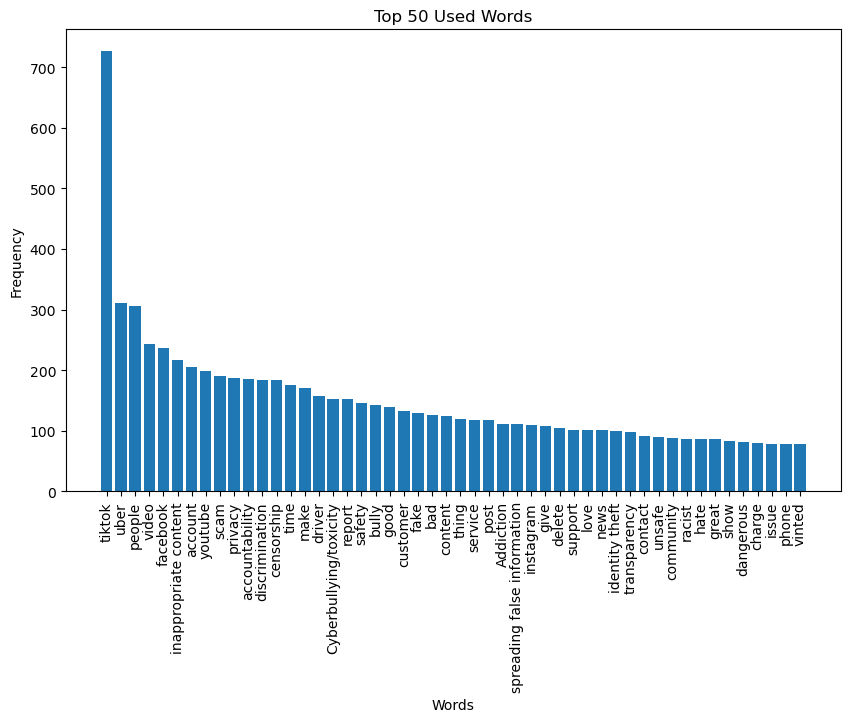

                             Word  Count   Support
3842                       tiktok    726  0.027581
3966                         uber    311  0.011815
2749                       people    306  0.011625
4175                        video    243  0.009232
1364                     facebook    237  0.009004
1898        inappropriate content    217  0.008244
35                        account    205  0.007788
4355                      youtube    198  0.007522
3323                         scam    191  0.007256
2942                      privacy    188  0.007142
36                 accountability    185  0.007028
1071               discrimination    184  0.006990
605                    censorship    184  0.006990
3851                         time    176  0.006686
2286                         make    171  0.006496
1167                       driver    157  0.005965
1          Cyberbullying/toxicity    153  0.005813
3174                       report    153  0.005813
3297                       safe

In [10]:
# Get the top 50 used words
top_50_words = word_counts_df.head(50)

# Plot a bar chart to visualize the word counts
plt.figure(figsize=(10, 6))
plt.bar(top_50_words['Word'], top_50_words['Count'])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 50 Used Words')
plt.xticks(rotation=90)
plt.show()

# Display the table with the top 50 used words
print(top_50_words)

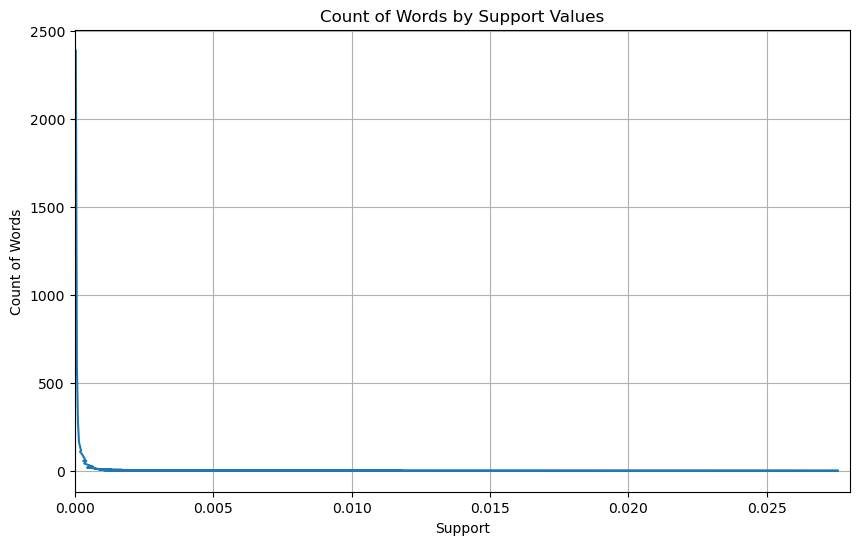

In [11]:
# Count the occurrences of each support value
support_counts = word_counts_df['Support'].value_counts()

# Create a bar plot to visualize the count of words for each support value
plt.figure(figsize=(10, 6))
plt.plot(support_counts.index, support_counts.values)
plt.xlabel('Support')
plt.ylabel('Count of Words')
plt.title('Count of Words by Support Values')
plt.grid(True)
# Set the x-axis limits to zoom in on a specific portion
plt.xlim(0, 0.028)
plt.show()

### Finding frequent itemsets with FP-growth

Here even lower threshold can be set for fpgrowth unlike apriori because of their performace difference.

In [17]:
start_time = time.time()
# max_len = 2 could be used to get only top rules
frequent_itemsets = fpgrowth(corpus_df, min_support = 0.001, use_colnames=True, max_len = 2)
print("---Runtime: %s seconds ---" % (time.time() - start_time))
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
print("the number of frequent itemsets generated:", len(frequent_itemsets))
frequent_itemsets

---Runtime: 1.3062729835510254 seconds ---
the number of frequent itemsets generated: 35607


,support,itemsets,length
0,0.113135,(account),1
1,0.102097,(accountability),1
2,0.097130,(time),1
3,0.043598,(issue),1
4,0.041943,(work),1
...,...,...,...
35602,0.001656,"(good, zoom)",2
35603,0.001104,"(information, zoom)",2
35604,0.001104,"(wrong, zoom)",2
35605,0.001104,"(message, zoom)",2


### Top 50 Frequent itemsets with at least 2 items

In [18]:
frequent_itemsets = frequent_itemsets.sort_values('support', ascending=False)
top_50_frequent_itemsets = frequent_itemsets.head(50)

top_50_frequent_itemsets[top_50_frequent_itemsets['length']> 1]

,support,itemsets,length
15769,0.103753,"(people, tiktok)",2
11384,0.098786,"(video, tiktok)",2
23414,0.088300,"(inappropriate content, tiktok)",2
33457,0.086645,"(uber, driver)",2
3903,0.076159,"(discrimination, tiktok)",2
19960,0.071744,"(tiktok, Cyberbullying/toxicity)",2
15160,0.066225,"(tiktok, bully)",2
15152,0.063466,"(Cyberbullying/toxicity, bully)",2
9158,0.059603,"(safety, uber)",2
13983,0.056291,"(censorship, facebook)",2


### Generating association rules
Association rules are genenrated with no additional pruning for now at this step.

In [19]:
# Generate association rules without performing additional pruning
rules = association_rules(frequent_itemsets, metric='support', min_threshold = 0.0)

#### Support/ Confidence Scatterplot

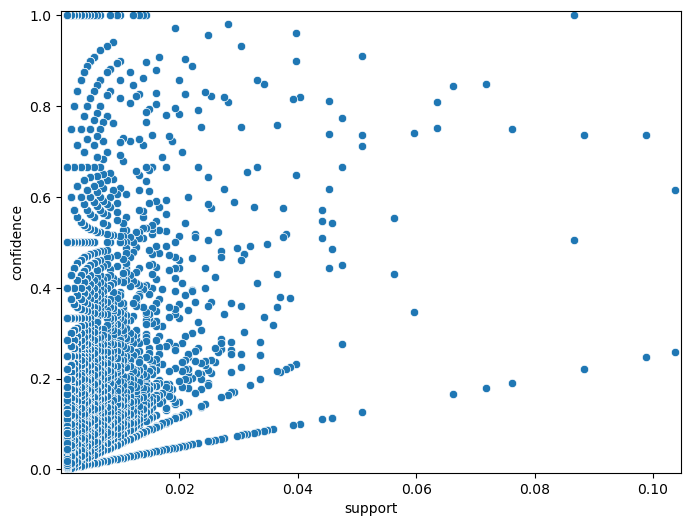

In [20]:
# Generate scatterplot using support and confidence
plt.figure(figsize=(8,6))
sns.scatterplot(x = "support", y = "confidence", data = rules)
plt.margins(0.01,0.01)

plt.show()

This confidence-support border shows that eliminating certain low-support rules would also imply eliminating rules that are strong based on numerous widely used measures.

### Optimality of the support-confidence border

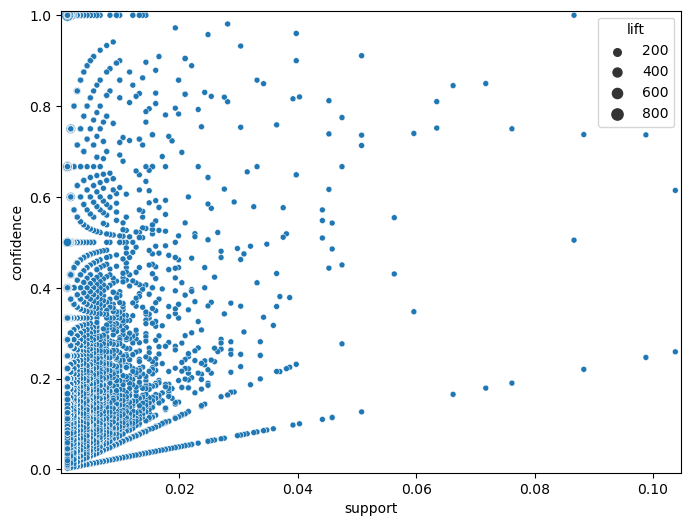

In [21]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = "support", y = "confidence", 
                size = "lift", data = rules)
plt.margins(0.01,0.01)
#plt.xlim(0.00, 0.03)
plt.show()

### The distribution of the Lift

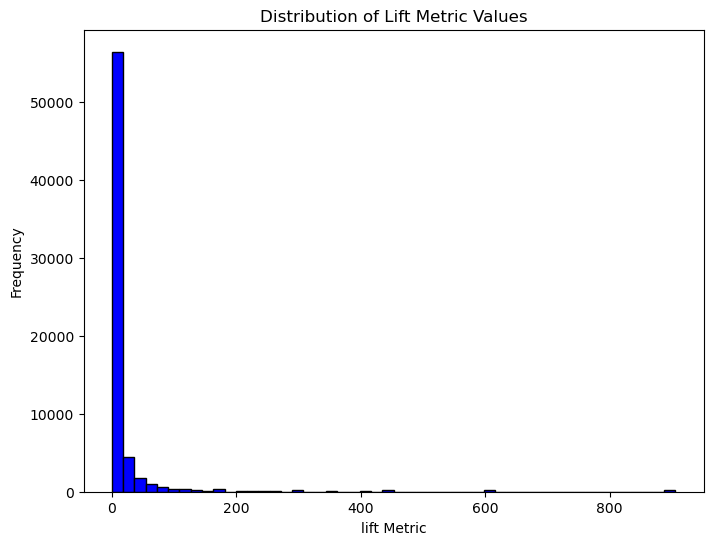

In [22]:
# Plot the distribution of the lift metric values
plt.figure(figsize=(8, 6))
plt.hist(rules['lift'], bins=50, color='blue', edgecolor='black')
plt.xlabel('lift Metric')
plt.ylabel('Frequency')
plt.title('Distribution of Lift Metric Values')
#plt.grid(True)
plt.show()

### Defining Zhang's rule

In [25]:
# Funtion to compute Zhang's rule from mlxtend association_rules output
def zhangs_rule(rules):
    antecedent_support = rules['antecedent support'].copy()
    consequent_support = rules['consequent support'].copy()
    confidence = rules['confidence'].copy()
    support = rules['support'].copy()
    
    expected_confidence = antecedent_support * consequent_support
    
    zhang_metric = (confidence - expected_confidence) /  (1 - expected_confidence)
    
    return zhang_metric

In [26]:
# Compute Zhang's rule
rules['zhang'] = zhangs_rule(rules)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang
0,(people),(tiktok),0.168874,0.400662,0.103753,0.614379,1.533409,0.036091,1.554215,0.586394
1,(tiktok),(people),0.400662,0.168874,0.103753,0.258953,1.533409,0.036091,1.121556,0.205174
2,(video),(tiktok),0.134106,0.400662,0.098786,0.736626,1.838520,0.045055,2.275611,0.721671
3,(tiktok),(video),0.400662,0.134106,0.098786,0.246556,1.838520,0.045055,1.149249,0.203774
4,(inappropriate content),(tiktok),0.119757,0.400662,0.088300,0.737327,1.840271,0.040318,2.281689,0.724088


In [27]:
rules.describe()

,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang
count,67246.000000,67246.000000,67246.000000,67246.000000,67246.000000,67246.000000,6.724600e+04,67246.000000
mean,0.038246,0.038246,0.001906,0.186478,21.286687,0.001062,inf,0.185737
std,0.057348,0.057348,0.002623,0.243223,76.174737,0.001804,NaN,0.243500
min,0.001104,0.001104,0.001104,0.002755,0.088832,-0.025014,6.226886e-01,-0.013801
25%,0.006071,0.006071,0.001104,0.035714,1.973856,0.000706,1.016619e+00,0.034753
50%,0.018764,0.018764,0.001104,0.088235,4.130699,0.000990,1.059108e+00,0.086944
75%,0.045806,0.045806,0.001656,0.222222,10.596491,0.001135,1.217501e+00,0.222052
max,0.400662,0.400662,0.103753,1.000000,906.000000,0.071773,inf,1.000000


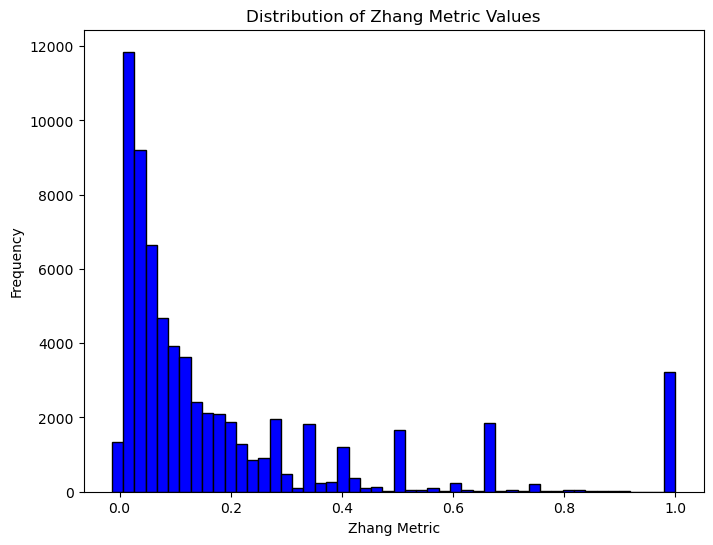

In [28]:
# Plot the distribution of the Zhang metric values
plt.figure(figsize=(8, 6))
plt.hist(rules['zhang'], bins=50, color='blue', edgecolor='black')
plt.xlabel('Zhang Metric')
plt.ylabel('Frequency')
plt.title('Distribution of Zhang Metric Values')
#plt.grid(True)
plt.show()

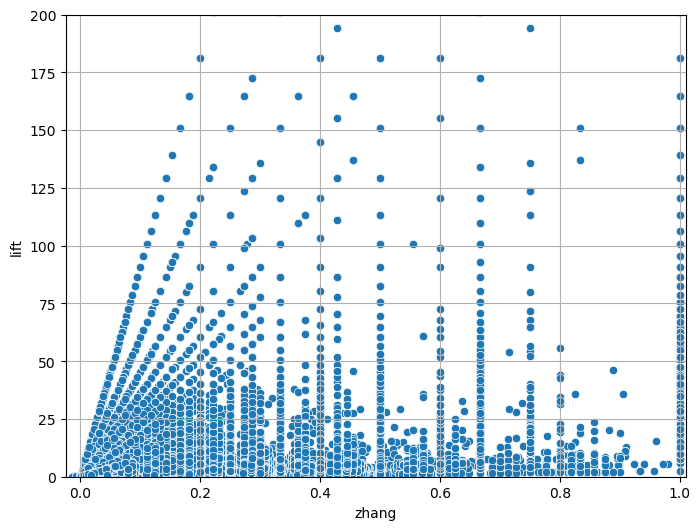

In [35]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = "zhang", y = "lift", data = rules)
plt.margins(0.01,0.01)
plt.grid(True)
#plt.xlim(0, 0.2)
plt.ylim(0, 200)
plt.show()

In [30]:
rules[rules['zhang'] > 0.1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang
0,(people),(tiktok),0.168874,0.400662,0.103753,0.614379,1.533409,0.036091,1.554215,0.586394
1,(tiktok),(people),0.400662,0.168874,0.103753,0.258953,1.533409,0.036091,1.121556,0.205174
2,(video),(tiktok),0.134106,0.400662,0.098786,0.736626,1.838520,0.045055,2.275611,0.721671
3,(tiktok),(video),0.400662,0.134106,0.098786,0.246556,1.838520,0.045055,1.149249,0.203774
4,(inappropriate content),(tiktok),0.119757,0.400662,0.088300,0.737327,1.840271,0.040318,2.281689,0.724088
...,...,...,...,...,...,...,...,...,...,...
67188,(behaviour),(scam),0.003311,0.105408,0.001104,0.333333,3.162304,0.000755,1.341887,0.333101
67190,(behaviour),(uber),0.003311,0.171634,0.001104,0.333333,1.942122,0.000535,1.242550,0.332954
67192,(behaviour),(driver),0.003311,0.086645,0.001104,0.333333,3.847134,0.000817,1.370033,0.333142
67194,(behaviour),(charge),0.003311,0.044150,0.001104,0.333333,7.550000,0.000958,1.433775,0.333236


In [31]:
rule_discrimination = rules[rules['antecedents'].astype(str).str.contains('discrimination')]
rule_discrimination.sort_values('zhang', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang
8,(discrimination),(tiktok),0.101545,0.400662,0.076159,0.750000,1.871901,0.035474,2.397351,0.739397
57,(discrimination),(racist),0.101545,0.048013,0.036424,0.358696,7.470765,0.031548,1.484454,0.355554
146,(discrimination),(people),0.101545,0.168874,0.024283,0.239130,1.416027,0.007134,1.092337,0.225855
155,(discrimination),(video),0.101545,0.134106,0.023731,0.233696,1.742619,0.010113,1.129961,0.223116
293,(discrimination),(racism),0.101545,0.024834,0.017108,0.168478,6.784058,0.014586,1.172748,0.166376
...,...,...,...,...,...,...,...,...,...,...
52365,(discrimination),(phone),0.101545,0.043598,0.001104,0.010870,0.249312,-0.003323,0.966912,0.006471
50404,(discrimination),(charge),0.101545,0.044150,0.001104,0.010870,0.246196,-0.003379,0.966354,0.006415
23994,(discrimination),(censorship),0.101545,0.101545,0.001656,0.016304,0.160562,-0.008656,0.913346,0.006055
57744,(discrimination),(Cyberbullying/toxicity),0.101545,0.084437,0.001104,0.010870,0.128730,-0.007470,0.925624,0.002315


In [32]:
rule_discrimination_zhang = rule_discrimination[rule_discrimination['zhang'] > 0.2]
rule_discrimination_zhang.sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang
57,(discrimination),(racist),0.101545,0.048013,0.036424,0.358696,7.470765,0.031548,1.484454,0.355554
8,(discrimination),(tiktok),0.101545,0.400662,0.076159,0.750000,1.871901,0.035474,2.397351,0.739397
155,(discrimination),(video),0.101545,0.134106,0.023731,0.233696,1.742619,0.010113,1.129961,0.223116
146,(discrimination),(people),0.101545,0.168874,0.024283,0.239130,1.416027,0.007134,1.092337,0.225855
